# Linear Regression on Customer Spend
---

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
dataset_file = '/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers'

In [10]:
df = pd.read_csv(dataset_file)

In [11]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [13]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


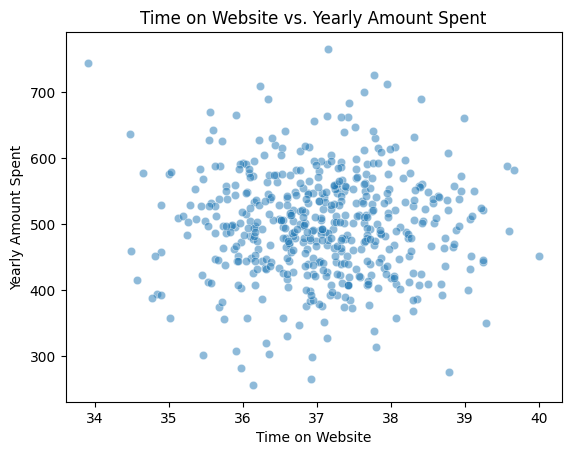

In [23]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# alpha= 0.5 refers to opasity. It darkens the area where more points lie together 
sns.scatterplot(data=df, x='Time on Website', y='Yearly Amount Spent', alpha= 0.5)
plt.title("Time on Website vs. Yearly Amount Spent")
plt.show()

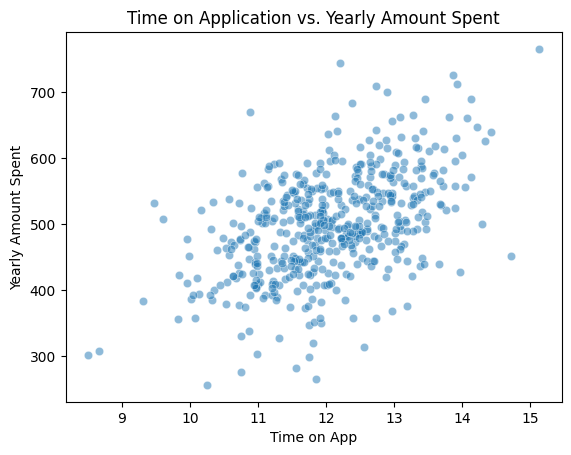

In [25]:
# alpha= 0.5 refers to opasity. It darkens the area where more points lie together 
sns.scatterplot(data=df, x='Time on App', y='Yearly Amount Spent', alpha= 0.5)
plt.title("Time on Application vs. Yearly Amount Spent")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


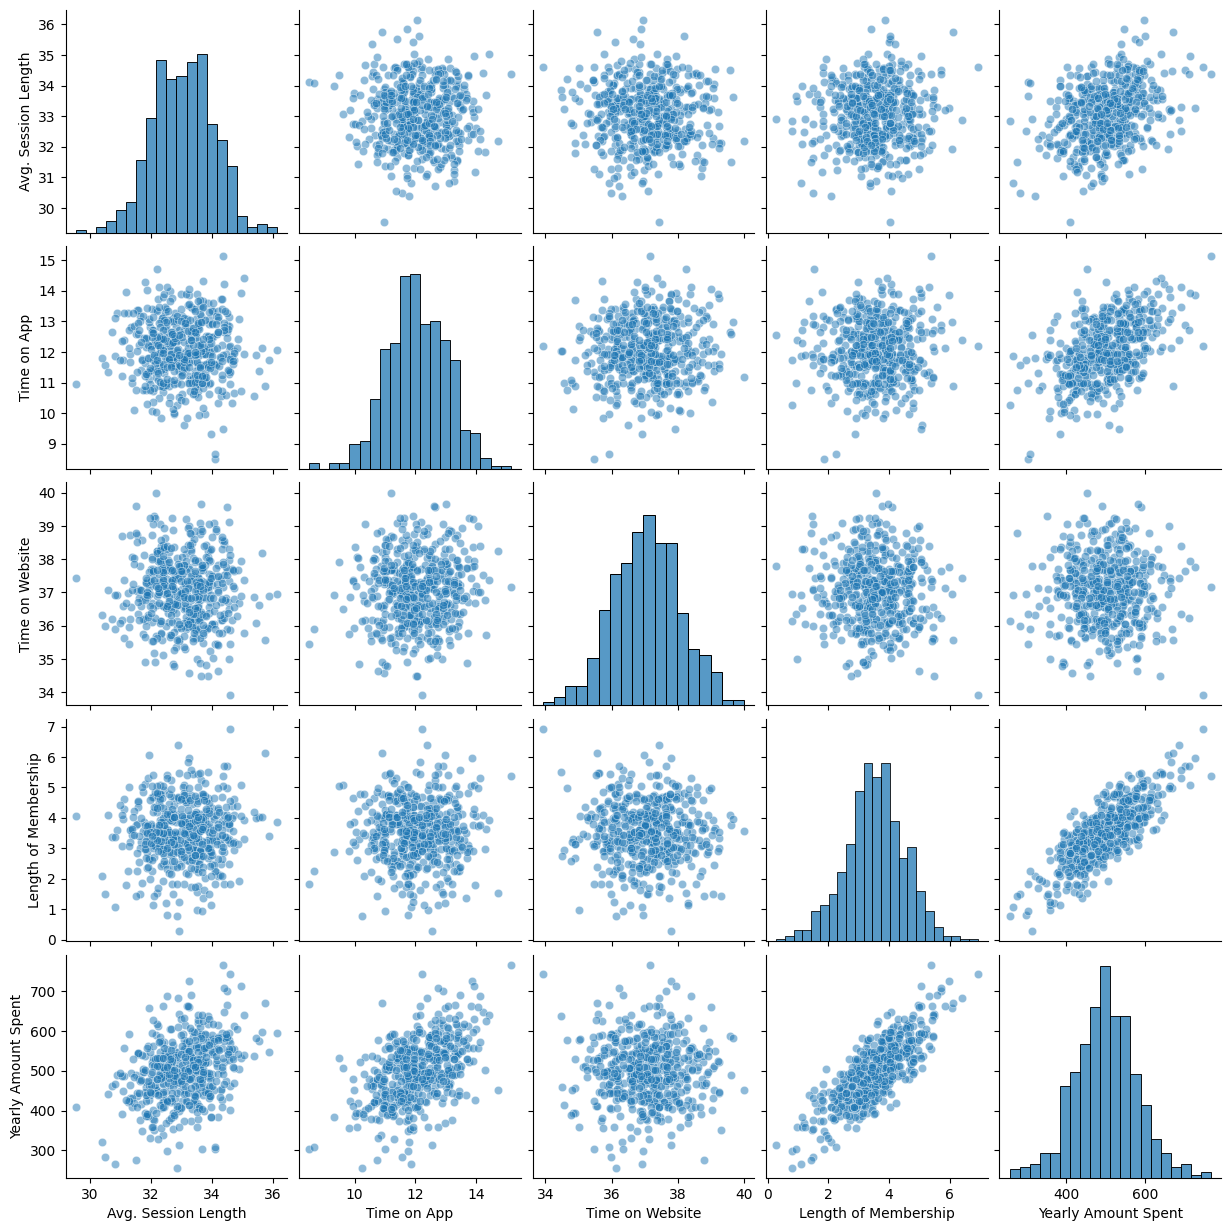

In [30]:
sns.pairplot(df, plot_kws={'alpha':0.5})

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


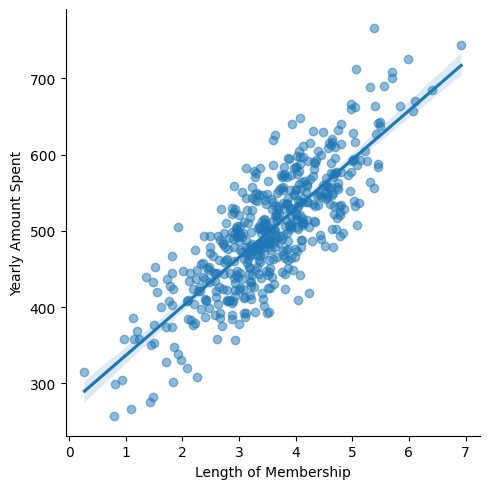

In [36]:
sns.lmplot(x='Length of Membership', y= 'Yearly Amount Spent', data=df, scatter_kws={'alpha':0.5})

In [55]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

<Axes: >

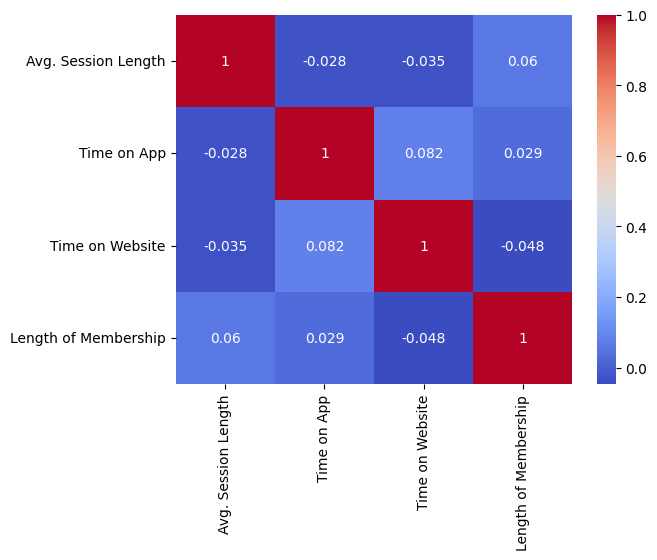

In [98]:
corr = X.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [61]:
model.fit(X_train, y_train,)

LinearRegression()

In [62]:
y_pred = model.predict(X_test)

In [85]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coef'])
cdf

,Coef
Avg. Session Length,25.784078
Time on App,38.508959
Time on Website,0.388212
Length of Membership,61.713913


Text(0, 0.5, 'Y_pred')

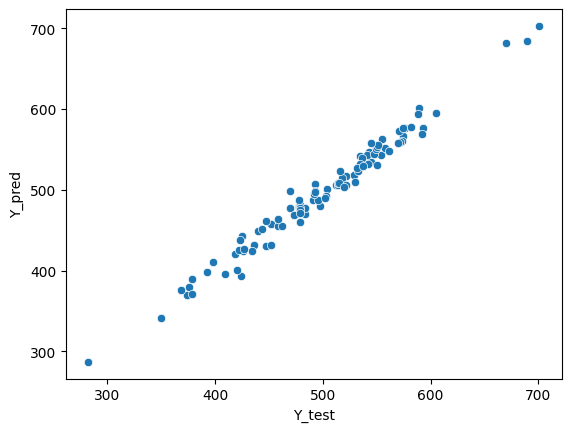

In [94]:
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

In [102]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [104]:
print(f'Mean absolute error = {mae(y_test, y_pred)}')
print(f'Mean squared error = {mse(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mse(y_test, y_pred))}')

Mean absolute error = 8.562574350222043
Mean squared error = 111.93763148745393
RMSE = 10.580058198679907


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


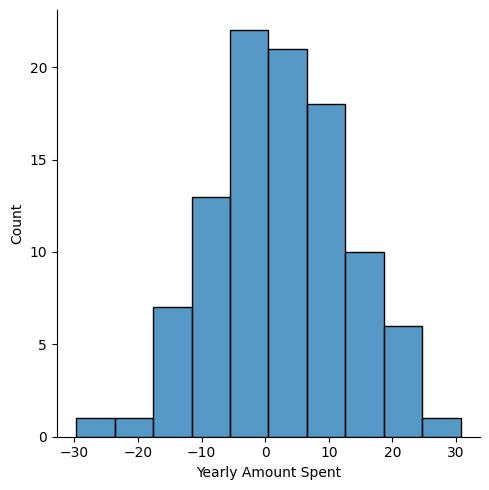

In [106]:
residuals = y_test - y_pred
sns.displot(residuals)

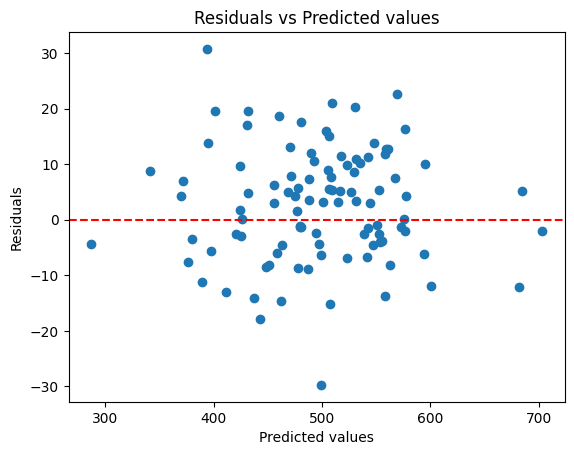

In [107]:

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at zero residual
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()